Epoch 1/10
29/29 [==============================] - 52s 2s/step - loss: 2.8160 - accuracy: 0.1656 - val_loss: 2.1371 - val_accuracy: 0.2700
Epoch 2/10
29/29 [==============================] - 58s 2s/step - loss: 1.7527 - accuracy: 0.3667 - val_loss: 2.0419 - val_accuracy: 0.2700
Epoch 3/10
29/29 [==============================] - 57s 2s/step - loss: 1.5207 - accuracy: 0.4600 - val_loss: 1.3847 - val_accuracy: 0.5000
Epoch 4/10
29/29 [==============================] - 55s 2s/step - loss: 1.1936 - accuracy: 0.5822 - val_loss: 1.4800 - val_accuracy: 0.5400
Epoch 5/10
29/29 [==============================] - 55s 2s/step - loss: 0.9576 - accuracy: 0.6856 - val_loss: 1.5760 - val_accuracy: 0.5500
Epoch 6/10
29/29 [==============================] - 56s 2s/step - loss: 0.7008 - accuracy: 0.7533 - val_loss: 1.5183 - val_accuracy: 0.5800
Epoch 7/10
29/29 [==============================] - 55s 2s/step - loss: 0.4294 - accuracy: 0.8656 - val_loss: 1.6865 - val_accuracy: 0.5900
Epoch 8/10
29/29 [==

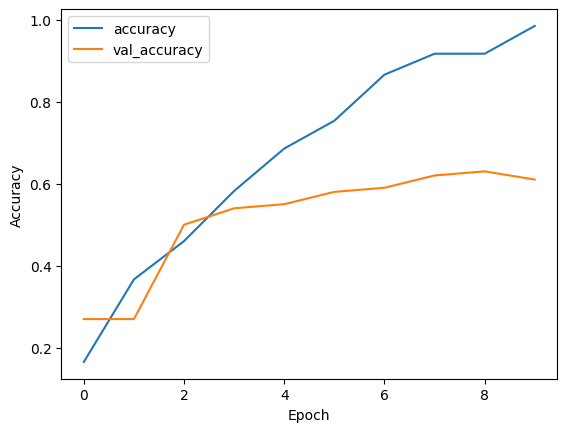

4/4 [==============================] - 2s 361ms/step - loss: 2.3181 - accuracy: 0.6100
Test accuracy: 61.00%
Model saved


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import pickle
import os

# Load the preprocessed pickle file
with open('dataset/preprocessed_data.pickle', 'rb') as f:
    data = pickle.load(f)

X_train, y_train = data['train_dataset'], data['train_labels']
X_test, y_test = data['test_dataset'], data['test_labels']

# Define a function to create the CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(87,1400,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(256, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create the CNN model
input_shape = X_train.shape
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
num_classes = len(np.unique(y_train))
# print(num)
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot the accuracy and loss curves during training
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy*100:.02f}%')

if os.path.exists('models/trained_CNN.h5'):
    print('File already exists')
else:
    model.save('models/trained_CNN.h5')
    print('Model saved')